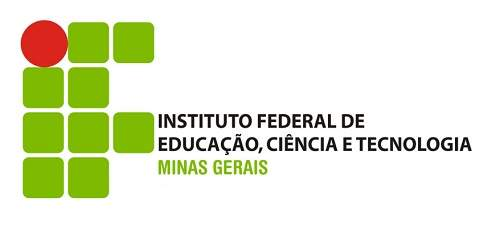

**Engenharia de Controle e Automação - Processamento de Sinais** - Prof. Leandro Freitas

#  João Vitor Prata Moreira Salgado - 0038210

#  Fernando Andrade da Silva - 0037130

##  Trabalho Prático 04 

### Projeto de Filtros FIR

## Introdução

Trabalho de Processamento de sinais abordando a filtragem por janelamento.

## Objetivo

Projeto e implementação de um filtro FIR com diferentes janelamentos.

# PROJETO DE FILTROS FIR

Para isso, considere o sinal: x(t) = 1,5 sin(2πa1t) − 3 sin(2πa2t) + 2 sin(2π(a1 + a2)t), em que a1 e a2 são
respectivamente o último número do registro acadêmico (RA) de cada integrante da dupla, sendo que a1 < a2 e que
a1 ≠ a2, sendo estes não nulos. Portanto, se os últimos números forem iguais ou um deles for zero, escolha o
penúltimo dígito de um dos alunos.

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal

In [4]:
a1=1

In [5]:
a2=3

In [18]:
xs = 5*(a1+a2)

In [19]:
t= np.arange(0,1000,1/xs)

In [20]:
x = 1.5*np.sin(2*np.pi*a1*t) - 3*np.sin(2*np.pi*a2*t) + 2*np.sin(2*np.pi*(a1+a2)*t)

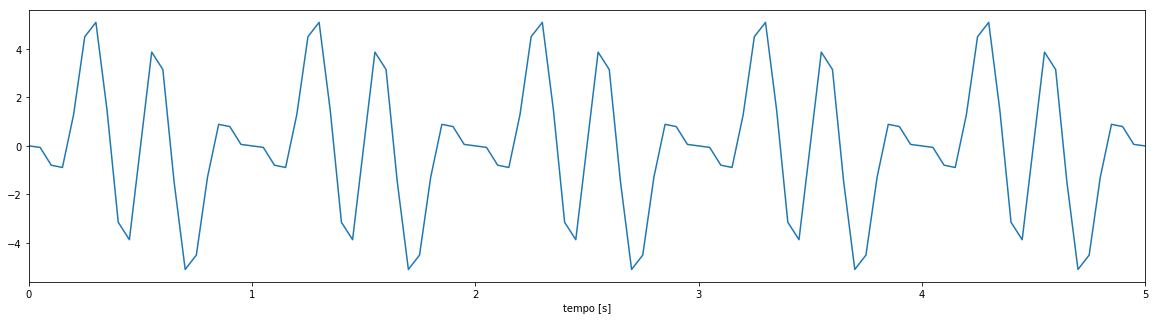

In [21]:
plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.xlabel('tempo [s]')
plt.xlim((0,5))
plt.show()


In [22]:
x_sp = np.fft.fft(x) #espectro

In [23]:
x_freq = np.fft.fftfreq(len(x), 1/2/np.pi)

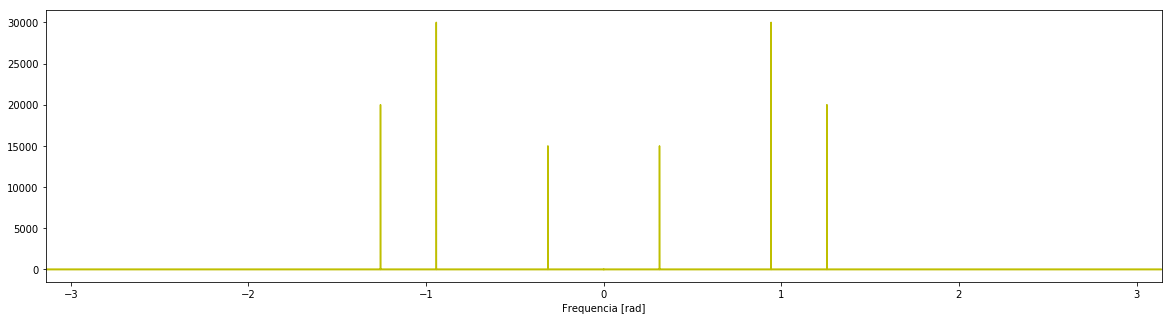

In [24]:
plt.figure(figsize=(20,5))
plt.plot(x_freq,abs(x_sp),'y')
plt.xlabel('Frequencia [rad]')
plt.xlim((-np.pi,np.pi))
plt.show()

## Deve ser feito o projeto de três tipos de filtros FIR:
### a) Passa-baixas (ya): em que apenas a frequência correspondente à a1 apareça na saída do filtro;

## Janela Hamming

In [64]:
from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta



def bandpass_firwin (ntaps, janela,width, window, fs): #Função de filtro tipo firwin_janela triangular
    
    wind = str(window)
    
    nyq =(float(fs) * 5)
    
    taps = sp.signal.firwin(ntaps,janela, width, window = wind,nyq = nyq, pass_zero=True)

    return taps




In [65]:
ntaps = 500
janela = 2
fs = 4
wind = 'hamming'
width = None

filtro_a1 = bandpass_firwin(ntaps,janela,fs, width, window)

ValueError: could not convert string to float: 'hamming'

In [ ]:
#filtro_a1 = sp.signal.firwin(500,2, width=None, window='hamming', fs=fs, pass_zero=True)

In [ ]:
ya1 = np.convolve(x,filtro_a1)
#ya1 = np.convolve(x,filtro_a1)

In [ ]:
ya1_sp = np.fft.fft(ya1) 

In [ ]:
ya1_freq = np.fft.fftfreq(len(ya1), 1/2/np.pi) 

## Janela Parzen

In [ ]:
filtro_a2 = sp.signal.firwin(50,2, width=None, window='parzen', fs=fs, pass_zero=True)

In [ ]:
ya2 = np.convolve(x,filtro_a2)

In [ ]:
ya2_sp = np.fft.fft(ya2) 

In [ ]:
ya2_freq = np.fft.fftfreq(len(ya2), 1/2/np.pi) 

Sinal Ideal

In [ ]:
ya_ideal = 1.5*np.sin(2*np.pi*a1*t)

#### Gráfico no domínio do *tempo*

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((ya_ideal),'g')
plt.plot((ya1),'b')
plt.plot((ya2),'r')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')
plt.xlim((0,300))
plt.show()

#### Gráfico no domínio da *frequência*

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(x_freq,abs(x_sp),'g')
plt.plot(ya1_freq,(abs(ya1_sp)),'b')
plt.plot(ya2_freq,(abs(ya2_sp)),'r')
plt.ylabel('Espectro')
plt.xlim(0,np.pi)

plt.subplot(2, 1, 2)
plt.plot(x_freq,abs(x_sp),'g') 
plt.plot(ya1_freq,(abs(ya1_sp)),'b') 
plt.plot(ya2_freq,(abs(ya2_sp)),'r') 
plt.xlabel('Freqência [rad]')
plt.xlim((0.312,0.318))
plt.show()

## b) Passa-altas (yb): em que apenas a frequência correspondente à a1 + a2 apareça na saída do filtro;

## Janela cosine

In [ ]:
filtro_b1 = sp.signal.firwin(201,3.5, width=None, window='cosine', fs=fs, pass_zero= False)

In [ ]:
yb1 = np.convolve(x,filtro_b1)

In [ ]:
yb1_sp = np.fft.fft(yb1) 

In [ ]:
yb1_freq = np.fft.fftfreq(len(yb1), 1/2/np.pi) 

## Janela flattop

In [ ]:
filtro_b2 = sp.signal.firwin(21, 3.5 ,width=None, window='flattop', fs=fs, pass_zero=False)

In [ ]:
yb2 = np.convolve(x,filtro_b2)

In [ ]:
yb2_sp = np.fft.fft(yb2) 

In [ ]:
yb2_freq = np.fft.fftfreq(len(yb2), 1/2/np.pi) 

Sinal Ideal

In [ ]:
yb_ideal = 2*np.sin(2*np.pi*(a1+a2)*t)

#### Gráfico no domínio do *tempo*

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((yb_ideal),'g')
plt.plot((yb1),'b')
plt.plot((yb2),'r')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')
plt.xlim((0,150))
plt.show()

#### Gráfico no domínio da *frequência*

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(x_freq,abs(x_sp),'g')
plt.plot(yb1_freq,(abs(yb1_sp)),'b')
plt.plot(yb2_freq,(abs(yb2_sp)),'r')
plt.ylabel('Espectro')
plt.xlim(0,np.pi)

plt.subplot(2, 1, 2)
plt.plot(x_freq,abs(x_sp),'g') 
plt.plot(yb1_freq,(abs(yb1_sp)),'b') 
plt.plot(yb2_freq,(abs(yb2_sp)),'r') 
plt.xlabel('Freqência [rad]')
plt.xlim((1.256,1.258))
plt.show()

## c) Rejeita-faixa (yc): em que a frequência correspondente à a2 seja filtrada e não apareça na saída do filtro.

## Janela nuttall

In [ ]:
filtro_c1 = sp.signal.firwin(301,[2.6,3.5], width=None, window='nuttall', fs=fs)

In [ ]:
yc1 = np.convolve(x,filtro_c1)

In [ ]:
yc1_sp = np.fft.fft(yc1) 

In [ ]:
yc1_freq = np.fft.fftfreq(len(yc1), 1/2/np.pi) 

## Janela triang

In [ ]:
filtro_c2 = sp.signal.firwin(31, [2.6,3.5] ,width=None, window='triang', fs=fs)

In [ ]:
yc2 = np.convolve(x,filtro_c2)

In [ ]:
yc2_sp = np.fft.fft(yc2) 

In [ ]:
yc2_freq = np.fft.fftfreq(len(yc2), 1/2/np.pi) 

Sinal ideal

In [ ]:
yc_ideal = 1.5*np.sin(2*np.pi*a1*t) + 2*np.sin(2*np.pi*(a1+a2)*t)

#### Gráfico no domínio do *tempo*

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((yc_ideal),'g')
plt.plot((yc1),'b')
plt.plot((yc2),'r')
plt.ylabel('Amplitude')
plt.xlabel('tempo [s]')
plt.xlim((0,300))
plt.show()

#### Gráfico no domínio da *frequência*

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.plot(x_freq,abs(x_sp),'g')
plt.plot(yc1_freq,(abs(yc1_sp)),'b')
plt.plot(yc2_freq,(abs(yc2_sp)),'r')
plt.ylabel('Espectro')
plt.xlim(0,np.pi)

plt.subplot(2, 1, 2)
plt.plot(x_freq,abs(x_sp),'g') 
plt.plot(yc1_freq,(abs(yc1_sp)),'b') 
plt.plot(yc2_freq,(abs(yc2_sp)),'r') 
plt.xlabel('Freqência [rad]')
plt.xlim((0.935,0.96))

plt.show()

# DESAFIO DE FILTRAGEM DA VOZ DO JOÃO

 A voz do João está atrapalhano escutar um determinado áudio, postado na página da disciplina como
“vozJoao_hallelujah.wav”. Projete um filtro FIR em que a saída apareça apenas a voz do João. Projete outro filtro FIR
que apareça apenas o que não é voz do João, i.e. que apareça o trecho da música de fundo.

In [ ]:
from IPython.display import Audio

Audio(filename='C:/Users/joaov/Downloads/vozJoao_hallelujah.wav')


In [ ]:
from scipy.io.wavfile import read

# read audio samples
input_data = read("C:/Users/joaov/Downloads/vozJoao_hallelujah.wav")
sample_rate = input_data[0]
audio = input_data[1]

x_axis = np.linspace(0, len(audio)/sample_rate, len(audio))

plt.figure(figsize=(18,6))
plt.plot(x_axis, audio)
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

plt.title("Grafico audio")

plt.xlim((0.4,0.5))

plt.show()

In [ ]:
yaudio_sp = np.fft.fft(audio) 

In [ ]:
yaudio_freq = np.fft.fftfreq(len(audio), 1/2/np.pi) 

In [ ]:
plt.figure(figsize=(15,17))

plt.subplot(2, 1, 1)
plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.ylabel('Espectro')
plt.xlim(0,0.4)

plt.show()

Filtrando a música de fundo

In [ ]:
#frequencia de amostragem = 44100

In [ ]:
filtro_audio = sp.signal.firwin(1001,[300,550], width=None, window='triang', fs=sample_rate, pass_zero=0)

In [ ]:
yaudio = np.convolve(audio,filtro_audio)

In [ ]:
yaudio_filtrado_sp = np.fft.fft(yaudio) 

In [ ]:
yaudio_filtrado_freq = np.fft.fftfreq(len(yaudio), 1/2/np.pi) 

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(211)
plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.plot(yaudio_filtrado_freq,(abs(yaudio_filtrado_sp)),'b')
plt.ylabel('Espectro')
plt.xlim(0.0,0.5)

plt.subplot(212)
plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.plot(yaudio_filtrado_freq,(abs(yaudio_filtrado_sp)),'b')
plt.ylabel('Espectro')
plt.xlim(0.0,0.1)

plt.show()

Filtrando a voz do João

In [ ]:
filtro_audio2 = sp.signal.firwin(7001,[30 0,550], width=None, window='nuttall', fs=sample_rate)

In [ ]:
yaudio2 = np.convolve(audio,filtro_audio2)

In [ ]:
yaudio2_filtrado_sp = np.fft.fft(yaudio2) 

In [ ]:
yaudio2_filtrado_freq = np.fft.fftfreq(len(yaudio2), 1/2/np.pi) 

In [ ]:
plt.figure(figsize=(15,12))

plt.plot(yaudio_freq,(abs(yaudio_sp)),'r')
plt.plot(yaudio2_filtrado_freq,(abs(yaudio2_filtrado_sp)),'b')
plt.ylabel('Espectro')
plt.xlim(0.0,0.1)

plt.show()